<p align="center">
<img src="https://www.fasttrack.co.uk/wp-content/uploads/lendable.png" width="30%">
</p>
<br><br>


**In light of coronavirus, Lendable has taken the business decision to make manual income verification mandatory.**

This workbook shows how I used data to inform my thinking on:
* A/B randomised test strategy and process
* Cost-benefit analysis of the randomised test
* Potential improvements to the income validation process
* Further data desired to inform decision

Two Excel files named `loanapplications.csv` and `session and seed table.csv` have been used in the analysis

**Assumptions:**
* The data from a few days in early April is a representative sample of Lendable loan applications
* The mandatory split and manual split sample populations are big enough to have statistical significance (e.g. A/B testing  sample population required was calculated)
* Everything else across the journey is held constant and this is the only change that has been made (e.g. no other journey changed occurred, code implementation for the test was fine etc.) 
* Missing first loan payment is an indicator that the customer is at risk of not repaying future loans – these are the types of customers we would like to avoid 

**Data dictionary:**
* Loan amount: amount borrowed
* Loan term: duration of loan in months
* Loan issues: 0 = no loan was issued, 1 = loan was issued
* Loan missed first payment: 0 = first payment was received, 1 = first payment was not received
* Customer completed open banking: 0 = open banking not used , 1 = open banking used
* Customer uploaded a payslip: 0 = did not upload payslip, 1 = uploaded payslip
* Customer signed contract: 0 = did not sign contract, 1 = signed contract
* Customer is a homeowner: 0 = does not own a home, 1 = owns a home

<br>

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Analysis of simplified merge test data**

In [3]:
# Import test
url_test = 'https://raw.githubusercontent.com/caryntan/sharing-github/master/session%20and%20seed%20table.csv'
df_test = pd.read_csv(url_test)

In [4]:
# Data dimensions, headers and number of unique values
print (df_test.shape)
df_test.head(5) 

(1010, 5)


,Session id,id,lifetime_id,name,value
0,000659de-7642-11ea-a8e5-069d8de3f4da,33352598,00051350-7642-11ea-a8e5-069d8de3f4da,mandatory-income-verification,mandatory
1,000a58c5-7b77-11ea-a8e5-069d8de3f4da,33641470,00091995-7b77-11ea-a8e5-069d8de3f4da,mandatory-income-verification,mandatory
2,00601bb1-7c05-11ea-a8e5-069d8de3f4da,33670653,005f2060-7c05-11ea-a8e5-069d8de3f4da,mandatory-income-verification,mandatory
3,0092b9c9-7a2c-11ea-a8e5-069d8de3f4da,33563434,00917986-7a2c-11ea-a8e5-069d8de3f4da,mandatory-income-verification,mandatory
4,00bf3b7f-7c1f-11ea-a8e5-069d8de3f4da,33679780,00be3938-7c1f-11ea-a8e5-069d8de3f4da,mandatory-income-verification,mandatory


In [5]:
# How many unique values are there in each column?
df_test.nunique().to_frame().reset_index()

,index,0
0,Session id,1010
1,id,1010
2,lifetime_id,1010
3,name,1
4,value,2


In [6]:
# What are they unique values in 'value' column?
print(df_test['value'].unique())

['mandatory' 'normal']


In [7]:
# Split between mandatory and normal income verificaiton
value = df_test.groupby('value')
df_test.groupby('value').value.agg('count').to_frame('count').reset_index()

,value,count
0,mandatory,780
1,normal,230


In [8]:
# Percent of split test groups 
count = (230/(230+780))
percentage = "{:.0%}".format(count)
print(percentage)

23%


In [9]:
# session and seed data set has 1010 unique rows 
# 230 (23%) of those rows allow the applicant to go through the loan application process without manual income verfication 
# randomised A/B split test of 77% to 23% to test hypothesis of usefulness of manual income validation requirement during covid 

# **Analysis of loan applications data**

In [10]:
# Import test
url_loan = 'https://raw.githubusercontent.com/caryntan/sharing-github/master/loanapplications.csv'
df_loan = pd.read_csv(url_loan)

In [11]:
# Data dimensions, headers and number of unique values
print (df_loan.shape)
df_loan.head(5) 

(744, 10)


,Application id,Session id,Loan Amount,Loan Term,Loan issued,Loan missed first payment,Customer completed open banking,Customer uploaded a payslip,Customer signed contract,Customer is a homeowner
0,18808923,a6f66c9e-74c0-11ea-a8e5-069d8de3f4da,1000.0,12,0,0,1,0,0,0
1,18848975,71489d11-75da-11ea-a8e5-069d8de3f4da,7000.0,30,1,0,1,1,1,0
2,18849326,bd5ec027-75db-11ea-a8e5-069d8de3f4da,8000.0,60,1,0,1,0,1,1
3,18849472,452fda42-75dc-11ea-a8e5-069d8de3f4da,6000.0,30,1,0,1,0,1,0
4,18849611,c44b91c5-75dc-11ea-a8e5-069d8de3f4da,1500.0,24,0,0,0,0,0,0


In [12]:
# How many unique values are there in each column?
df_loan.nunique().to_frame().reset_index()

,index,0
0,Application id,744
1,Session id,744
2,Loan Amount,83
3,Loan Term,9
4,Loan issued,2
5,Loan missed first payment,2
6,Customer completed open banking,2
7,Customer uploaded a payslip,2
8,Customer signed contract,2
9,Customer is a homeowner,2


In [13]:
# Distribution of key numeric columns
round(df_loan[['Loan Amount','Loan Term']].describe())

,Loan Amount,Loan Term
count,744.0,744.0
mean,4021.0,34.0
std,3155.0,15.0
min,500.0,12.0
25%,1500.0,24.0
50%,3000.0,36.0
75%,5000.0,48.0
max,20000.0,60.0


In [14]:
#loan term of 60 to years
60/12

5.0

# **Merge tables**

In [15]:
# Drop irrelevant columns and combine loan application and test table in a left join on 'session id' - only interested in test data associated to a loan application row
df_test.drop(['id','lifetime_id','name'], axis = 1, inplace = True)
df_test.info()
df_combined = df_loan.merge(df_test, on="Session id", how = "left")
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Session id  1010 non-null   object
 1   value       1010 non-null   object
dtypes: object(2)
memory usage: 15.9+ KB


,Application id,Session id,Loan Amount,Loan Term,Loan issued,Loan missed first payment,Customer completed open banking,Customer uploaded a payslip,Customer signed contract,Customer is a homeowner,value
0,18808923,a6f66c9e-74c0-11ea-a8e5-069d8de3f4da,1000.0,12,0,0,1,0,0,0,mandatory
1,18848975,71489d11-75da-11ea-a8e5-069d8de3f4da,7000.0,30,1,0,1,1,1,0,mandatory
2,18849326,bd5ec027-75db-11ea-a8e5-069d8de3f4da,8000.0,60,1,0,1,0,1,1,mandatory
3,18849472,452fda42-75dc-11ea-a8e5-069d8de3f4da,6000.0,30,1,0,1,0,1,0,mandatory
4,18849611,c44b91c5-75dc-11ea-a8e5-069d8de3f4da,1500.0,24,0,0,0,0,0,0,mandatory


In [16]:
#Shape of table to ensure I did not lose rows
print (df_combined.shape)

(744, 11)


In [17]:
# Understand values 
df_combined.nunique().to_frame().reset_index()

,index,0
0,Application id,744
1,Session id,744
2,Loan Amount,83
3,Loan Term,9
4,Loan issued,2
5,Loan missed first payment,2
6,Customer completed open banking,2
7,Customer uploaded a payslip,2
8,Customer signed contract,2
9,Customer is a homeowner,2


In [18]:
# Proportion of mandatory to normal
proportion = pd.crosstab(index=df_combined["value"], 
                           columns="count")
100*(proportion/proportion.sum())

col_0,count
value,
mandatory,77.150538
normal,22.849462


In [19]:
# Payslip or openbanking = income validation requirement - create new column
df_combined['Income Val']= df_combined['Customer completed open banking'] + df_combined['Customer uploaded a payslip']
df_combined.head(5)

,Application id,Session id,Loan Amount,Loan Term,Loan issued,Loan missed first payment,Customer completed open banking,Customer uploaded a payslip,Customer signed contract,Customer is a homeowner,value,Income Val
0,18808923,a6f66c9e-74c0-11ea-a8e5-069d8de3f4da,1000.0,12,0,0,1,0,0,0,mandatory,1
1,18848975,71489d11-75da-11ea-a8e5-069d8de3f4da,7000.0,30,1,0,1,1,1,0,mandatory,2
2,18849326,bd5ec027-75db-11ea-a8e5-069d8de3f4da,8000.0,60,1,0,1,0,1,1,mandatory,1
3,18849472,452fda42-75dc-11ea-a8e5-069d8de3f4da,6000.0,30,1,0,1,0,1,0,mandatory,1
4,18849611,c44b91c5-75dc-11ea-a8e5-069d8de3f4da,1500.0,24,0,0,0,0,0,0,mandatory,0


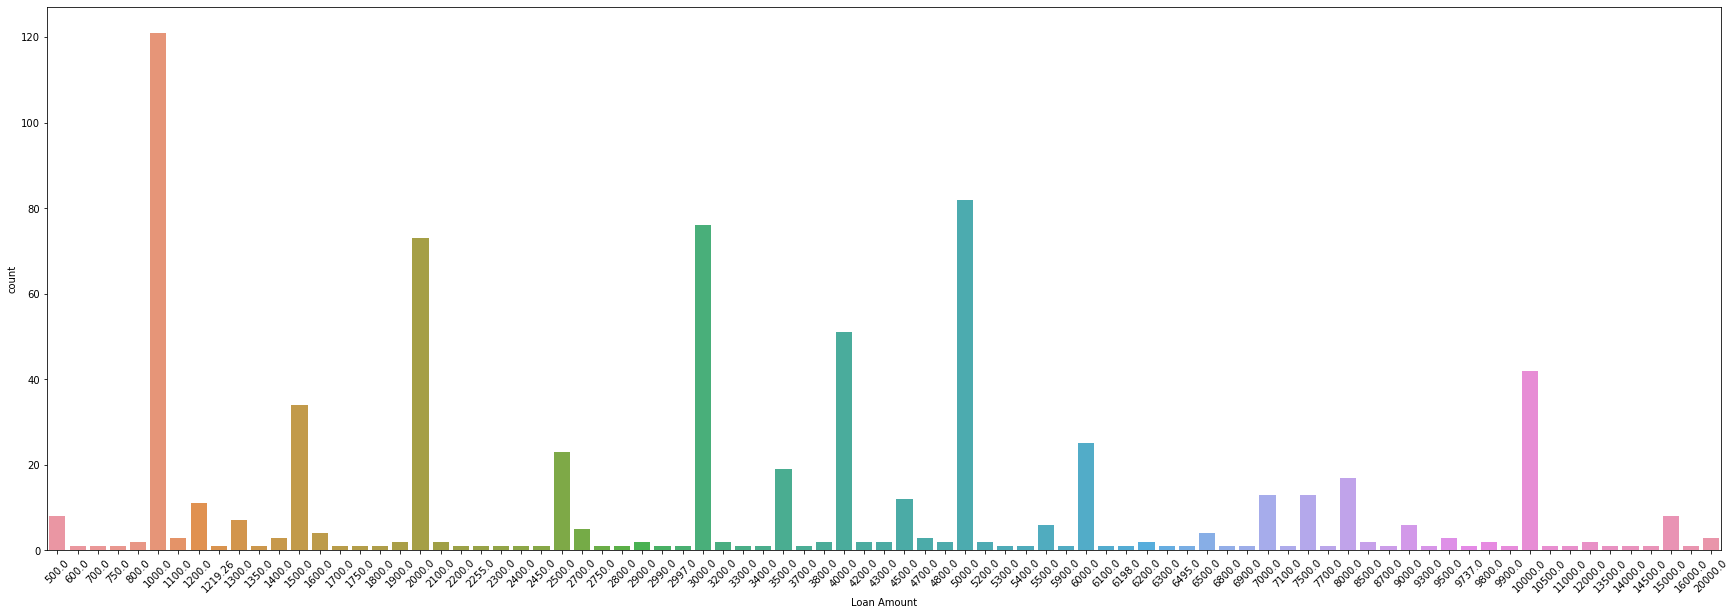

In [20]:
# Checking out the loan distribution - out of curiosity
plt.figure(figsize =(30,10))
sns.countplot(x ='Loan Amount', data =  df_combined)
plt.xticks(rotation=45)
plt.show()

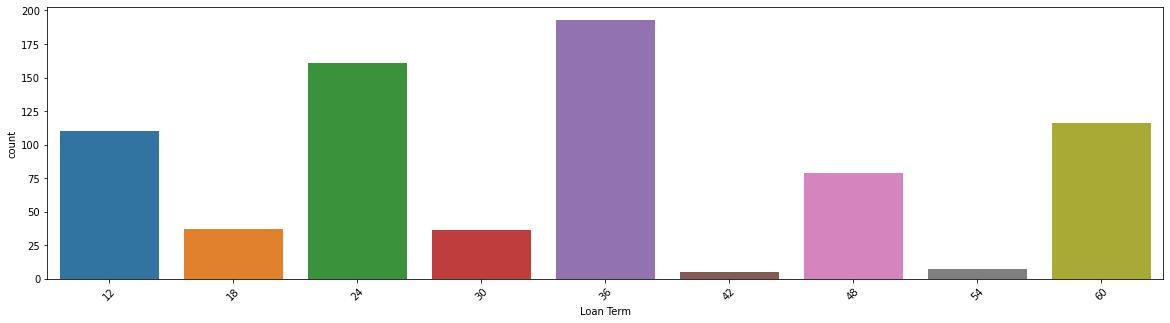

In [21]:
# Checking out the loan term distribution out of curiosity
plt.figure(figsize =(20,5))
sns.countplot(x ='Loan Term', data =  df_combined)
plt.xticks(rotation=45)
plt.show()

In [22]:
# Got tired of typing column names using associated array/dictionary - found code to simplify by adding underscores
df_combined.columns = df_combined.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_combined.head(5)

,application_id,session_id,loan_amount,loan_term,loan_issued,loan_missed_first_payment,customer_completed_open_banking,customer_uploaded_a_payslip,customer_signed_contract,customer_is_a_homeowner,value,income_val
0,18808923,a6f66c9e-74c0-11ea-a8e5-069d8de3f4da,1000.0,12,0,0,1,0,0,0,mandatory,1
1,18848975,71489d11-75da-11ea-a8e5-069d8de3f4da,7000.0,30,1,0,1,1,1,0,mandatory,2
2,18849326,bd5ec027-75db-11ea-a8e5-069d8de3f4da,8000.0,60,1,0,1,0,1,1,mandatory,1
3,18849472,452fda42-75dc-11ea-a8e5-069d8de3f4da,6000.0,30,1,0,1,0,1,0,mandatory,1
4,18849611,c44b91c5-75dc-11ea-a8e5-069d8de3f4da,1500.0,24,0,0,0,0,0,0,mandatory,0


In [23]:
# Crosstab of test and loan issued outcomec
loan = pd.crosstab(df_combined.value, df_combined.loan_issued)
loan

loan_issued,0,1
value,,
mandatory,283,291
normal,57,113


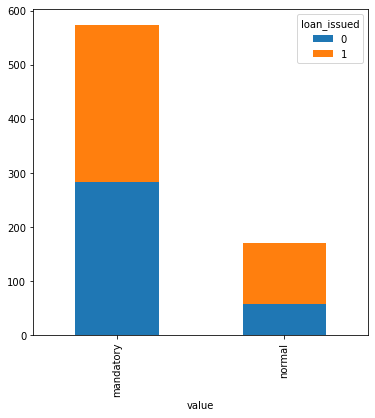

In [35]:
loan.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

In [36]:
# first loan payment
missed_pay = pd.crosstab( df_combined.value, df_combined.loan_missed_first_payment)
missed_pay

loan_missed_first_payment,0,1
value,,
mandatory,571,3
normal,164,6


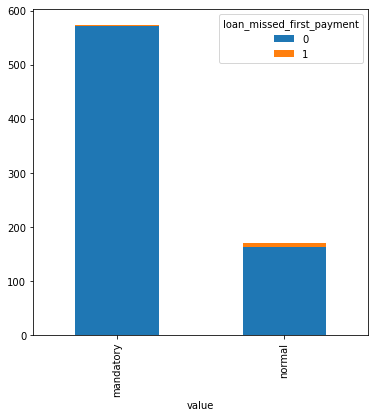

In [37]:
missed_pay.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

In [40]:
# how many actually proceeded with the manual income validation?
income_val = pd.crosstab( df_combined.value, df_combined.income_val)
income_val

income_val,0,1,2
value,,,
mandatory,232,228,114
normal,117,46,7


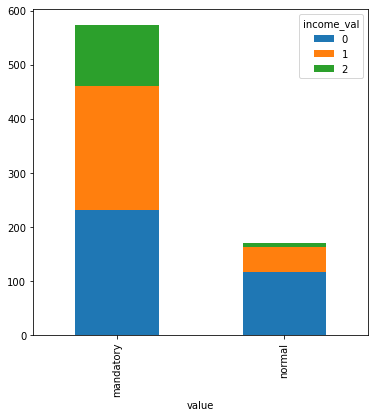

In [39]:
income_val.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

In [44]:
#customer_completed_open_banking
open_bank = pd.crosstab( df_combined.value, df_combined.customer_completed_open_banking)
open_bank

customer_completed_open_banking,0,1
value,,
mandatory,264,310
normal,124,46


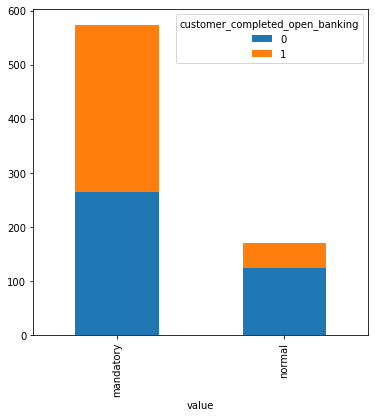

In [43]:
open_bank.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

In [46]:
#customer_uploaded_a_payslip
payslip = pd.crosstab( df_combined.value, df_combined.customer_uploaded_a_payslip)
payslip

customer_uploaded_a_payslip,0,1
value,,
mandatory,428,146
normal,156,14


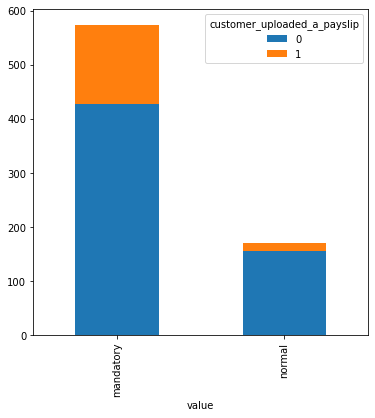

In [47]:
payslip.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

In [48]:
#customer_signed_contract
contract = pd.crosstab( df_combined.value, df_combined.customer_signed_contract)
contract

customer_signed_contract,0,1
value,,
mandatory,226,348
normal,41,129


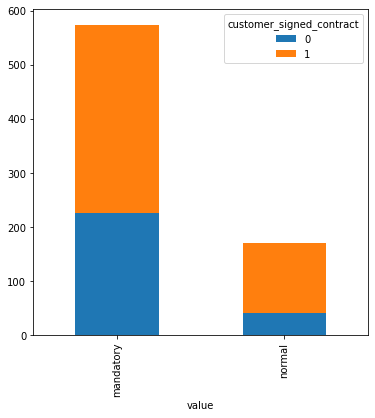

In [49]:
contract.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

In [31]:
#customer_is_a_homeowner
home = pd.crosstab( df_combined.value, df_combined.customer_is_a_homeowner)
home

customer_is_a_homeowner,0,1
value,,
mandatory,361,213
normal,113,57


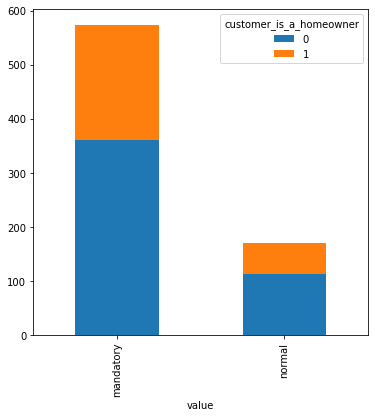

In [32]:
home.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

In [50]:
# mandatory customers seem to be better customers 